In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
df=pd.read_csv('D:\Data science\Data sample\Titanic dataset\Titanic-Dataset.csv')

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


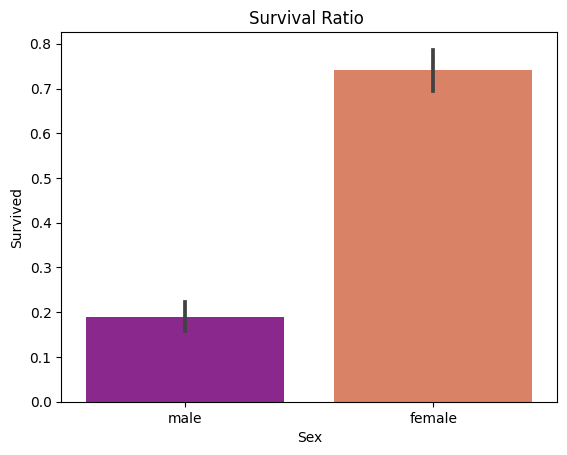

In [130]:
sns.barplot(x='Sex',y='Survived', data=df ,palette='plasma')
plt.title('Survival Ratio ')
print("Percentage of females who survived:", df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


Percentage of Pclass = 1 who survived : 62.96296296296296
Percentage of Pclass = 2 who survived : 47.28260869565217
Percentage of Pclass = 3 who survived : 24.236252545824847


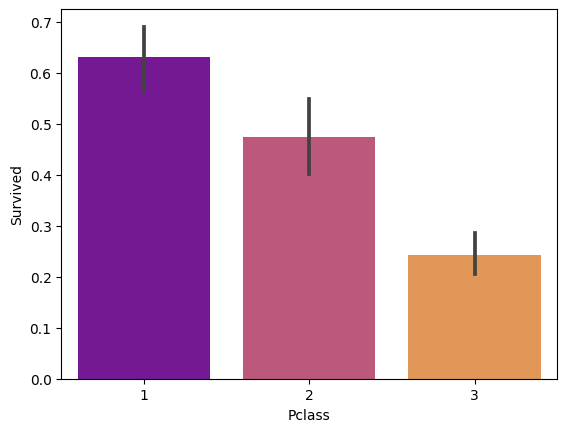

In [123]:
sns.barplot(x='Pclass',y='Survived', data=df,palette='plasma')
print('Percentage of Pclass = 1 who survived :', df['Survived'][df['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass = 2 who survived :', df['Survived'][df['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Percentage of Pclass = 3 who survived :', df['Survived'][df['Pclass']==3].value_counts(normalize=True)[1]*100)

Percentage of SibSp = 0 who survived : 34.53947368421053
Percentage of SibSp = 1 who survived : 53.588516746411486
Percentage of SibSp = 2 who survived : 46.42857142857143


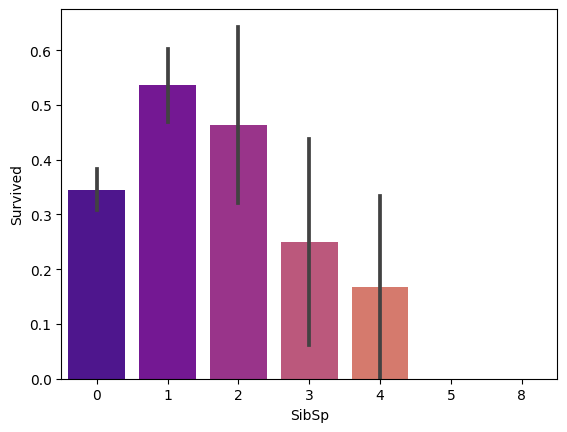

In [149]:
sns.barplot(x='SibSp', y='Survived', data=df, palette='plasma')
print('Percentage of SibSp = 0 who survived :', df['Survived'][df['SibSp']==0].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp = 1 who survived :', df['Survived'][df['SibSp']==1].value_counts(normalize=True)[1]*100)
print('Percentage of SibSp = 2 who survived :', df['Survived'][df['SibSp']==2].value_counts(normalize=True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

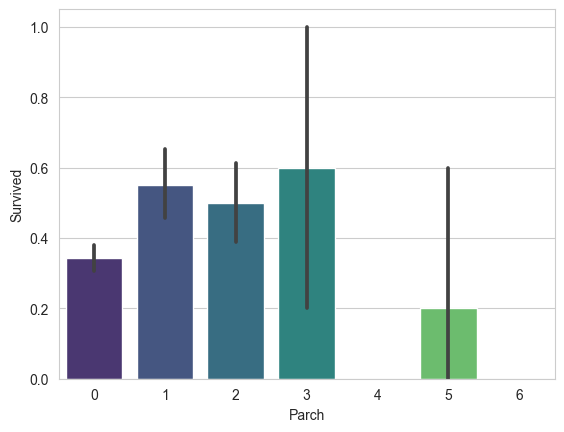

In [156]:
sns.barplot(x='Parch', y= 'Survived', data=df, palette='viridis')
sns.set_style('whitegrid')  


People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

Percentage of southampton Survival : 33.798449612403104
Percentage of cherbourg Survival : 55.35714285714286
Percentage of queenstown Survival : 39.743589743589745


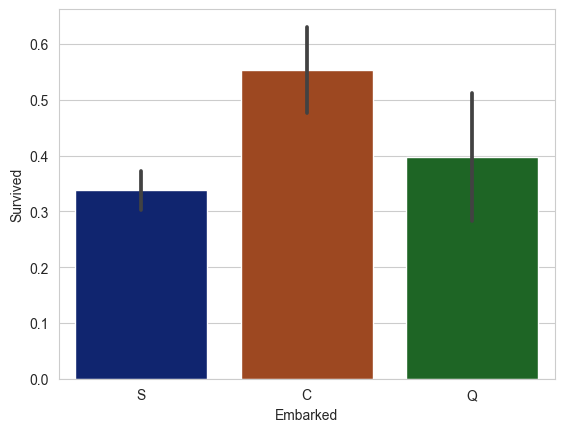

In [199]:
sns.barplot(x='Embarked',y='Survived',data=df,palette='dark')
print('Percentage of southampton Survival :', df['Survived'][df['Embarked']=='S'].value_counts(normalize=True)[1]*100)
print('Percentage of cherbourg Survival :', df['Survived'][df['Embarked']=='C'].value_counts(normalize=True)[1]*100)
print('Percentage of queenstown Survival :', df['Survived'][df['Embarked']=='Q'].value_counts(normalize=True)[1]*100)

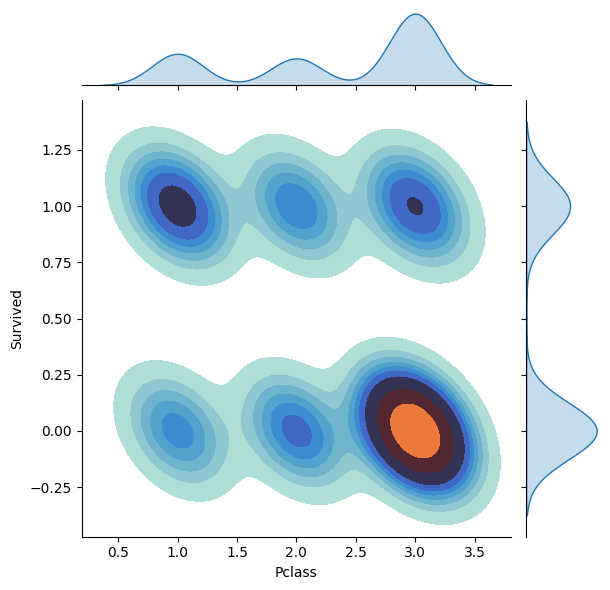

In [156]:
sns.jointplot(x='Pclass',y='Survived',data=df,kind='kde',fill=True, cmap='icefire')
plt.show()

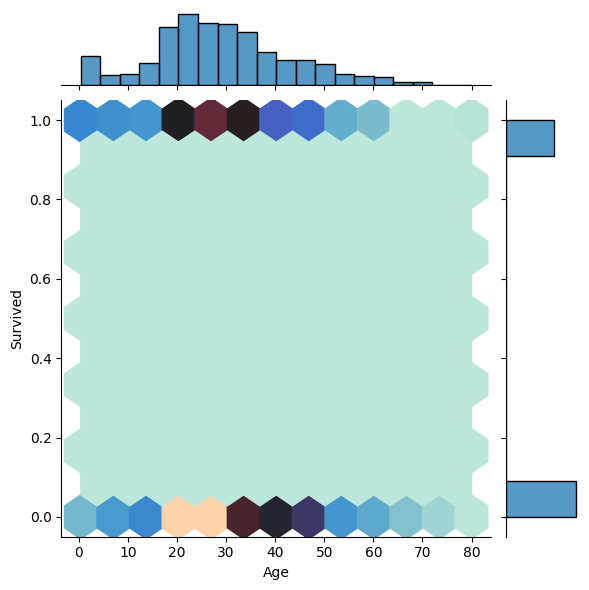

In [167]:
sns.jointplot(x='Age',y='Survived',data=df,kind='hex',cmap='icefire')

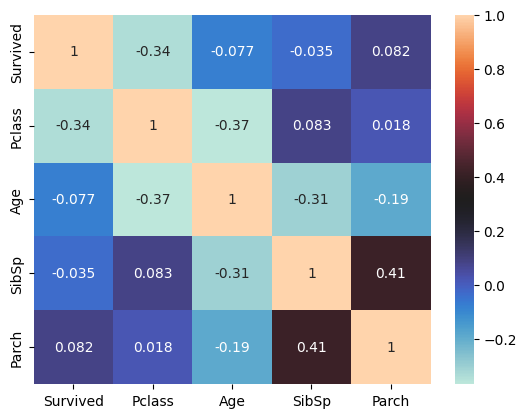

In [150]:
sns.heatmap(df.corr(),annot=True, cmap='icefire')
plt.show()

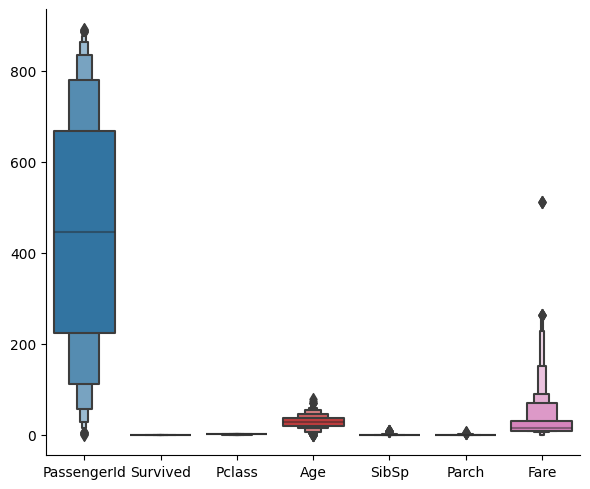

In [161]:
sns.catplot(data=df,kind='boxen',height=5,aspect=1.2)
plt.show()

    #Data Cleaning

In [202]:
southampton=df[df['Embarked']=='S'].shape[0]
print('No of people in Embarked Southampton :', southampton)
cherbourg=df[df['Embarked']=='C'].shape[0]
print('No of people in Embarked cherbourg :', cherbourg)
queenstown=df[df['Embarked']=='Q'].shape[0]
print('No of people in Embarked Queenstown :', queenstown)

No of people in Embarked Southampton : 645
No of people in Embarked cherbourg : 168
No of people in Embarked Queenstown : 78


     Cleaning data for Ml model

In [47]:
na_val=pd.isna(df)
na_val.sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
dtype: int64

    Creating Dummy values for Gender

In [27]:
sex_dumm=pd.get_dummies(df.Sex)
s_dumm_int=(sex_dumm==1).astype(int)
s_dumm_int

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


    Creating dummy values for Embarked

In [28]:
em_dummy=pd.get_dummies(df.Embarked)
em_dum=(em_dummy==1).astype(int)
em_dum

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


    droping unnesessary values

In [ ]:
merged.drop(['Sex','PassengerId','Name','Ticket','Cabin','Fare','Embarked'],axis='columns',inplace=True)

    Merging dummy values with dataframe

In [38]:
merged=pd.concat([s_dumm_int,em_dum,df],axis='columns')
merged

,female,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch
0,0,1,0,0,1,0,3,22.0,1,0
1,1,0,1,0,0,1,1,38.0,1,0
2,1,0,0,0,1,1,3,26.0,0,0
3,1,0,0,0,1,1,1,35.0,1,0
4,0,1,0,0,1,0,3,35.0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,2,27.0,0,0
887,1,0,0,0,1,1,1,19.0,0,0
888,1,0,0,0,1,0,3,NaN,1,2
889,0,1,1,0,0,1,1,26.0,0,0


    Applying interpolation method on Age to deal with NaN values

In [54]:
final=merged.interpolate()
final

,female,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch
0,0,1,0,0,1,0,3,22.0,1,0
1,1,0,1,0,0,1,1,38.0,1,0
2,1,0,0,0,1,1,3,26.0,0,0
3,1,0,0,0,1,1,1,35.0,1,0
4,0,1,0,0,1,0,3,35.0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,2,27.0,0,0
887,1,0,0,0,1,1,1,19.0,0,0
888,1,0,0,0,1,0,3,22.5,1,2
889,0,1,1,0,0,1,1,26.0,0,0


    Assigning indepedent (features) to X and depedent to y

In [139]:
X=final.drop(['Survived'],axis='columns')
y=final['Survived']

    Applying Machine learning LinearRegression Model

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=4)
model = LogisticRegression(solver='saga',max_iter=1000)  # You can adjust the value as needed
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Razaque\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

    Predict rest data

In [194]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1], dtype=int64)

In [203]:
accu=model.score(X_test,y_test)
print(f'Accuracy of Model is : {accu*100:.2f}')

Accuracy of Model is : 85.56


    A loop to check different values of random_state and test_size for a linear regression model and calculate the R-squared score for each combination:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assume you have your features X and labels y
# X, y = ...

best_accuracy = 0.0
best_random_state = 0
best_test_size = 0.0

for random_state in range(1, 11):  # Loop through different random_state values
    for test_size in np.arange(0.1, 1.0, 0.1):  # Loop through different test_size values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        
        model = LogisticRegression()  # You can use your desired model here
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state
            best_test_size = test_size

print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Best Random State: {best_random_state}")
print(f"Best Test Size: {best_test_size:.2f}")